In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("~\.cache\kagglehub\datasets\waalbannyantudre\gene-expression-cancer-rna-seq-donated-on-682016\\versions\\1\data.csv")
labels = pd.read_csv("~\.cache\kagglehub\datasets\waalbannyantudre\gene-expression-cancer-rna-seq-donated-on-682016\\versions\\1\labels.csv")

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\ayarmanco\AppData\Local\Temp\ipykernel_28752\923119767.py:1: SyntaxWarning: invalid escape sequence '\.'
  data = pd.read_csv("~\.cache\kagglehub\datasets\waalbannyantudre\gene-expression-cancer-rna-seq-donated-on-682016\\versions\\1\data.csv")
C:\Users\ayarmanco\AppData\Local\Temp\ipykernel_28752\923119767.py:2: SyntaxWarning: invalid escape sequence '\.'
  labels = pd.read_csv("~\.cache\kagglehub\datasets\waalbannyantudre\gene-expression-cancer-rna-seq-donated-on-682016\\versions\\1\labels.csv")


In [ ]:
data = data.rename(columns={"Unnamed: 0": "sample_id"})
labels = labels.rename(columns={"Unnamed: 0": "sample_id"})
genes = data.filter(regex="gene_")
scaler = StandardScaler()
scaled_data = scaler.fit_transform(genes)

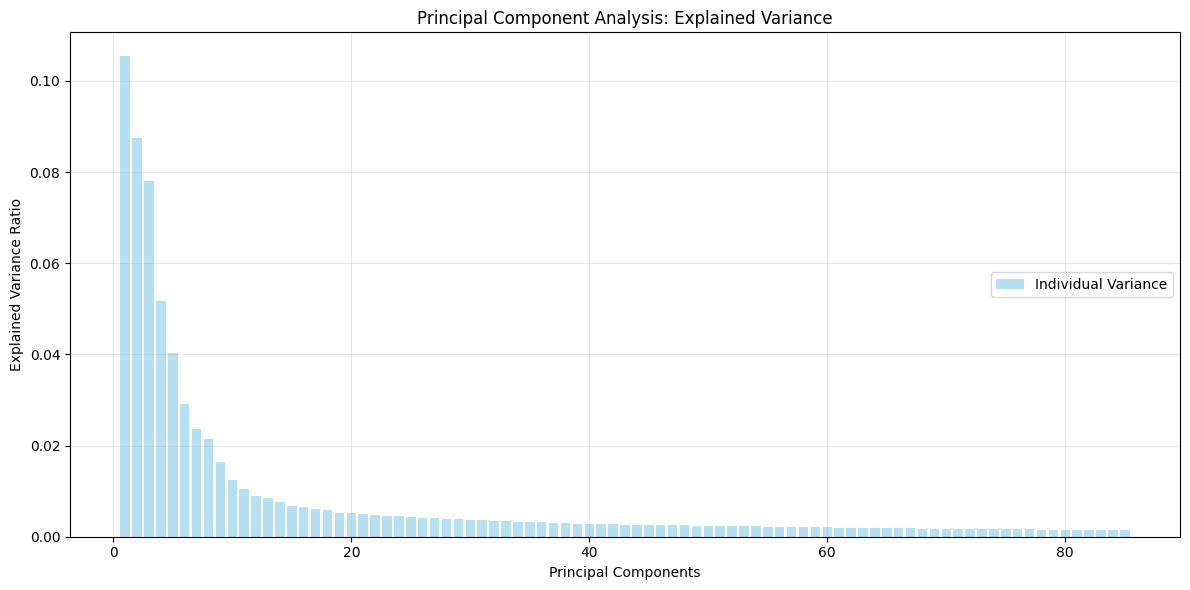

In [32]:
# Initialize PCA (specify components or retain variance)
pca = PCA(n_components=0.70)  # Keep 95% of variance
principal_components = pca.fit_transform(scaled_data)

# Calculate explained variance and cumulative variance
explained_variance = pca.explained_variance_ratio_
components = range(1, len(explained_variance) + 1)

# Create plot
plt.figure(figsize=(12, 6))

# Bar plot for individual explained variance
bars = plt.bar(components, explained_variance, alpha=0.6, color='skyblue', label='Individual Variance')

# Labels and title
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Principal Component Analysis: Explained Variance')
plt.legend(loc='center right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()